# Приоритизация гипотез. А/В тест для увеличения выручки интернет магазина

Интернет магазину необходимо проверить сформированные гипотезы. Выбрать наиболее перспективные из них. А так изучить анализ проведенного A/B теста. Определить какая группа оказалась наиболее стастически значимой, а так же решить, какой был результат теста, либо стоит ли его продолжать.
Проект состоит из двуз частей:
1. В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
2. Результаты проведенного A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as stats

## Приоритизация гипотез

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
data.columns = data.columns.str.lower()
data.style.set_properties(subset=['hypothesis'], **{'width': '300px'})

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
data['ICE'] = (data['impact'] * data['confidence']) / data['efforts']
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


In [5]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False))

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Вывод:

Показатели приотета гипотез изменились при использовании ICE и RICE. При применние ICE Самой первой следовало проверить гипотезу о "запуске акции, дающую скидку на день рождения", а при примении RICE "Добавить форму подписки на все основные страницы", Это произошло потому что, фреймворк RICE учитывает еще и параметр "Reach", который показывает охват пользователей, в отличии от ICE. Согласно этому, охват гипотезы о акции на день рождения охватит только одного пользователя, а о добавлении формы подписки 10 пользователей.

## Анализ A/B-теста

### Обзор данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
display(orders.head(5))
visitors.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### Подготовка данных

Приведем формат времени к формату datetime.

In [8]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим нет ли в данных пользователей, которые попали в обе группы

In [9]:
orders.groupby('visitorId')['group'].unique()

visitorId
5114589          [B]
6958315          [B]
8300375       [B, A]
11685486         [A]
39475350         [B]
               ...  
4266935830    [A, B]
4278982564       [A]
4279090005       [B]
4281247801       [B]
4283872382       [B]
Name: group, Length: 1031, dtype: object

Действительно в данных есть пользователи, которые попали в обе группы, избавимся от них:

In [10]:
# разделим датафрейм на две части по группе и смерджим обратно, используя visitorId
orders_a = orders.query('group == "A"')
orders_b = orders.query('group == "B"')
# используем тип объединения inner, чтобы в объединенный датасет попали только id, которые есть в обеих группах. 
orders_id = orders_a.merge(orders_b, on='visitorId', how='inner') 
 
display(orders_id)
 
# выберем уникальные id
id_list = orders_id['visitorId'].unique()
display(id_list)
len(id_list)
 
# отфильтруем исходный датафрем по id
orders = orders[~orders['visitorId'].isin(id_list)]
orders

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B
...,...,...,...,...,...,...,...,...,...
178,3757656646,4186807279,2019-08-14,4990,A,1759418862,2019-08-21,18560,B
179,3757656646,4186807279,2019-08-14,4990,A,380064637,2019-08-27,13740,B
180,3612788481,2712142231,2019-08-14,2490,A,1251767592,2019-08-16,790,B
181,4052155355,2949041841,2019-08-14,190,A,1329499668,2019-08-14,10380,B


array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


### Кумулятивная выручка по группам

Собираем кумулятивные данные:

In [11]:
datesGroups = orders[['date','group']].drop_duplicates() #создаем массив с уникальными парами 'date' и 'group'

In [12]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <=
                                   x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'transactionId' : pd.Series.nunique,
        'visitorId' : pd.Series.nunique,
        'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

ordersAggregated  # собираем кумулятивные данные по дням о заказах

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [13]:
visitorsAggregated = datesGroups.apply(lambda x:
                                      visitors[np.logical_and(visitors['date'] <= x['date'],
                                                             visitors['group'] == x['group'])].agg({
                                          'date' : 'max',
                                          'group' : 'max',
                                          'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated #собираем кумулятивные данные о посетителях

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [14]:
# объединяем кумулятивные данные в одной таблице
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


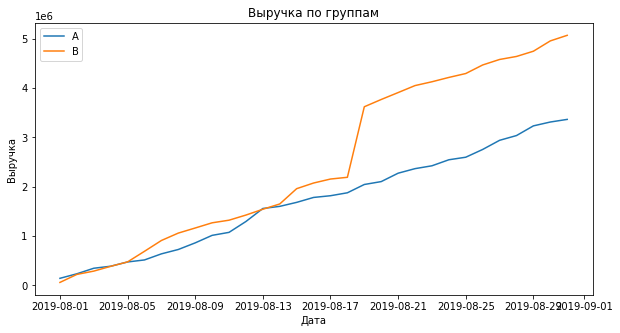

In [15]:
#объявляем переменные по группам теста и строим график
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Ближе к середине теста сегмент В вышел вперед и продолжал лидировать весь остаток теста. Однако в середине теста заметет резкий скачок, возможно выбросы влияют на результаты.

### Кумулятивный средний чек по группам

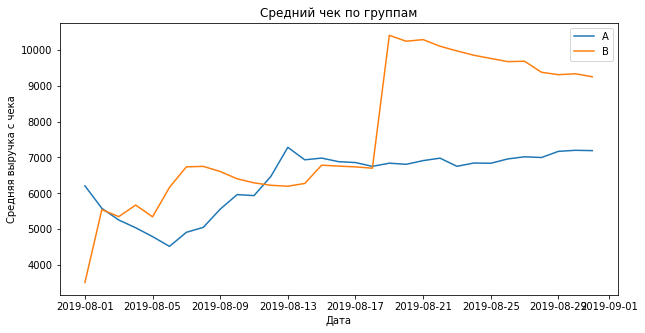

In [16]:
# строим графики кумулятивного среднего чека по группам
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средняя выручка с чека')
plt.show()

Кумулятивное движение среднего чека так же продолжает колебаться и в сегменте В так же заметен резкий скачок, требуется дополнительный анализ выбросов.

### Относительное изменение кумулятивного среднего чека группы B к группе A

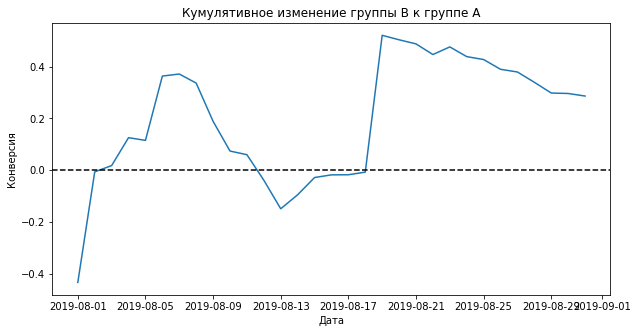

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Кумулятивное изменение группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

Результаты теста резко и значительно менялись на протяжении теста, скорее всего именно тогда и были совершены аномальные заказы

### Кумулятивная конверсия по группам

In [18]:
# добавляем показатели конвернсии в массив
cumulativeData['conversion'] = round(cumulativeData['orders'] / cumulativeData['visitors'], 3)
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.032
1,2019-08-01,B,17,17,59758,713,0.024
2,2019-08-02,A,42,36,234381,1338,0.031
3,2019-08-02,B,40,39,221801,1294,0.031
4,2019-08-03,A,66,60,346854,1845,0.036


In [19]:
# для того чтобы задать масштаб графика определим максимальную и минимальную даты
# и максимальную и минимальную конверсии
print(cumulativeData['date'].max())
print(cumulativeData['date'].min())
print(cumulativeData['conversion'].max())

2019-08-31 00:00:00
2019-08-01 00:00:00
0.036


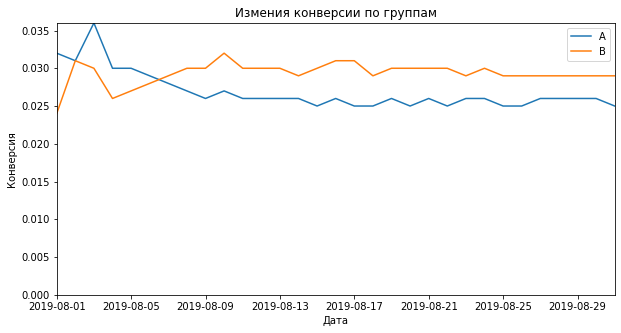

In [20]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.036])
plt.title('Измения конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста видно, что сегмент А имел большую конверсию чем сегмент В, но со временем сегмент В выровнялся, а сегмент А снизился и конверсии обоих сегментов зафиксировались.

### Относительное изменение кумулятивной конверсии группы B к группе A

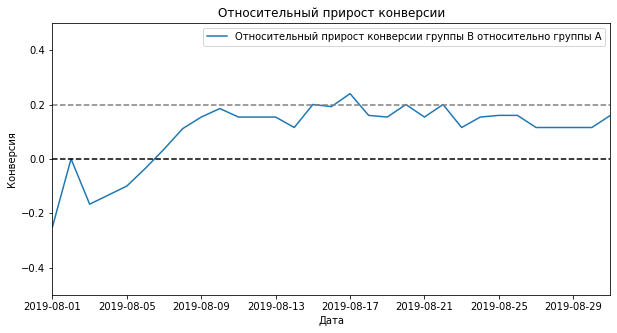

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.title('Относительный прирост конверсии')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

В начале теста группа В проигрывала группе А, но затем выросла, и вырвалась вперед и практически зафиксировалась. Но отношение конверсии еще не установилось. Стоит проанализировать аномалии, возможно они изменят картину.

### Количество заказов по пользователям

In [22]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


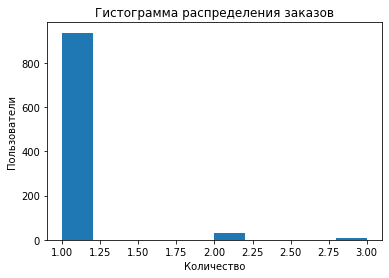

In [23]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения заказов')
plt.xlabel('Количество')
plt.ylabel('Пользователи')
plt.show()

Большинство пользователей совершило один заказ, но чтобы определить сколько пользователей совершило 2 и более заказов построим точечный график.

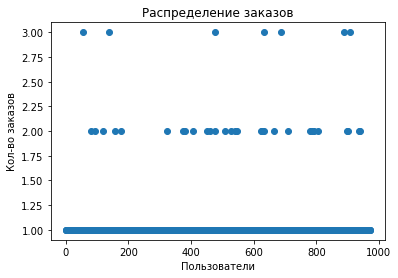

In [24]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Распределение заказов')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.show()

Пользователи сделавших 3 заказа очень мало всего лишь 7 человек, возможно они и могут выбросами, чтобы определить так ли это посчитаем перцентили

### Считаем 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей совершали 2 заказа и не более 1% пользователей совершали 3 заказа.

### Строим точечный график стоимостей заказов

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


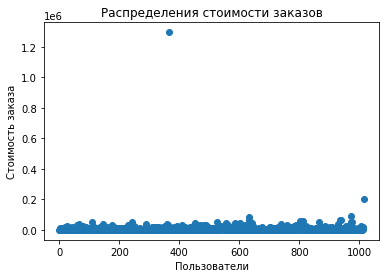

In [26]:
display(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределения стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.show()

Большая часть заказов находиться до 100 тыс. руб., есть один заказ в 200 тыс. руб и один заказ свыше 1.2 млн. руб. Заказ свыше одного млн. выглядит аномально. Посчитаем перцентили стоимости заказов.

### Считаем 95-й и 99-й перцентили стоимости заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Большая часть заказов была сделана до 26785 тыс. руб. 5% от 26785 до 53904 и не больше чем 1% свыше 53904 тыс. руб.

### Считаем статистическую значимость различий в конверсии между группами по «сырым» данным

In [28]:
# Соберем кумулятивные данные по заказам и пользователям в один массив
# Собираем данные по пользователям
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
# Аналогично делаем с заказам
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# Собираем полученные данные в один массив
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(df.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [29]:
# Определяем группы для теста 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
display(ordersByUsersA)
display(ordersByUsersB)

,userId,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


,userId,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


In [30]:
#Объявляем переменные в которых пользователям с заказами будет соотвествовать число заказов пользователя.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Проверим гипотезы о:
* Н0 различий в среднем количестве заказов между группами нет.
* Н1 различия в среднем между группами есть.
Для этого применим тест Манна-Уитни.

In [31]:
# p-value для сравнения среднего между группами
print('P-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) 
# Относительное различие между группами
print('Относительное различие', "{0:.3f}".format((df['ordersPerDateB'].sum()/df['visitorsPerDateB'].sum())/(df['ordersPerDateA'].sum()/df['visitorsPerDateA'].sum())-1)) 


P-value 0.011
Относительное различие 0.160


p-value меньше чем 0.05, значит отвергаем нулевую гипотезу о том, различий между группами нет, и принимаем альтернативную: "Различия в среднем между группами есть.
Относительный прирост среднего группы В к конверсии группы А равн 16%.

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Проверим гипотезы о:

Н0 различий в среднем чеке заказов между группами нет.
Н1 различия в среднем чеке между группами есть. Для этого применим тест Манна-Уитни.

In [32]:
# p-value для сравнения среднего чека между группами
print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# Относительное различие среднего чека между группами
print('Относительное различие', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value 0.829
Относительное различие 0.287


p-value больше 0.05, значит статистически значимых отличий в среднем чеке между группами нет, А так же относительное различие среднего чека составило 28,7% не является статистически значимым, так как была принята нулевая гипотеза.

### Считаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Приступаем к очистке данных от аномалий, Мы определили 95 и 99 перцентили количества заказов и суммы заказов на основе этого, принимаем за аномальных пользователей тех, кто совершил более 2 заказов и тех кто совершил заказ свыше 26785 тыс рублей. Таким образом мы уберем 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head())

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64

Таким образом мы получили список аномальных пользователей

Сохраняем очищенные данные в переменные:

In [34]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Проверим гипотезы о:
* Н0 различий в среднем количестве заказов между группами нет.
* Н1 различия в среднем между группами есть.
Для этого применим тест Манна-Уитни.

In [35]:
# p-value для сравнения среднего между очищенными группами
print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# Относительное различие между очищенными группами
print('Относительное различие','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value 0.009
Относительное различие 0.189


Аналогично с "сырыми данными, сегмент В лучше сегмента А. Отвергаем нулевую гипотезу и принимаем альтернативную. А приросто конверсии группы В к группе А равен 19%

### Считаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным 

Проверим гипотезы о:

* Н0 различий в среднем чеке заказов между группами нет.
* Н1 различия в среднем чеке между группами есть. Для этого применим тест Манна-Уитни.

In [36]:
# # p-value для сравнения среднего чека между очищенными группами
print('P-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
# Относительное различие среднего чека между очищенными группами
print('Относительное различие',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value 0.762
Относительное различие -0.022


p-value больше 0.05 значит принимаем нулевую гипотезу о том что различий в среднем чеке заказов между группами нет., но при этом значительно упал прирост конверсии группы В к группе А.

### Вывод

1. Группы статистически различны. Об этом говорят проведенные тесты.
2. Согласно данным можно сделать вывод о том, что выбросы все же повлияли на анализ, сегмент В лидировал до удаления выбросов, так же лидирует по количеству заказов, но вот по среднему чеку, проигрывает сегменту А на 2.2 процента.
3. Исходя из этого можно сказать, что сегмент В лидирует по количеству заказов, но средний чек сегмента В ниже чем сегмента А на 2.2 процента. Только разница в том, что различие по неочищенным данным в пользу сегмента В, а по очищенным в пользу сегмента А 

## Общий вывод.

1. Можно принять разницу в 2 процента незначительной, тогда тест можно признать успешным, на основании прироста конверсии в 19% по колиечству заказов сегмент В выигрывает и тест можно завершать. 
2. Так же учитывая количество заказов сегмента B, можно сказать, что он определенно выигрывает у сегмента А.
3. Поэтому можно сказачать что, различий по среднему чеку между сегментами, но по приросту заказов сегмент В выигрывает, причем количество заказов продолжает расти и даже с сохраввнившеимся средним чеком выручка будет расти.
4. Тест считается завершенным. 